In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime

# Access_integrated_ues

In [3]:
Access_integrated_ues = pd.read_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\Access_integrated_ues_H.csv").drop(columns = 'Unnamed: 0')

In [4]:
dfA = Access_integrated_ues.groupby(['time_hour','stationnam']).sum().reset_index()
dfA['time_hour'] = dfA['time_hour'].astype('datetime64')
dfA = dfA[(dfA['time_hour'].dt.strftime("%Y%m%d")>='20210420')&(dfA['time_hour'].dt.strftime("%Y%m%d")<='20210820')]

In [5]:
dfA['time_hour'] = dfA['time_hour'].astype('datetime64[ns]')
dfA['time_hour'] = dfA['time_hour'].dt.strftime("%Y-%m-%d %H")
dfA = dfA [['stationnam', 'trips_D', 'time', 'time_hour']]
dfA['time_hour'] = dfA['time_hour'].astype('datetime64[ns]')
dfA['day'] = dfA['time_hour'].dt.strftime("%Y-%m-%d")
dfA

,stationnam,trips_D,time,time_hour,day
196712,上塘,103.0,2021042006,2021-04-20 06:00:00,2021-04-20
196713,上屋,52.0,2021042006,2021-04-20 06:00:00,2021-04-20
196714,上梅林,137.0,2021042006,2021-04-20 06:00:00,2021-04-20
196715,上水径,21.0,2021042006,2021-04-20 06:00:00,2021-04-20
196716,上沙,112.0,2021042006,2021-04-20 06:00:00,2021-04-20
...,...,...,...,...,...
689672,黄贝岭,148.0,2021082023,2021-08-20 23:00:00,2021-08-20
689673,龙井,11.0,2021082023,2021-08-20 23:00:00,2021-08-20
689674,龙华,40.0,2021082023,2021-08-20 23:00:00,2021-08-20
689675,龙城广场,9.0,2021082023,2021-08-20 23:00:00,2021-08-20


In [6]:
# dfA.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\mean_trips\Access_integrated_ues_weather.csv",encoding = 'utf-8-sig')

## morning

In [7]:
dfA_morning = dfA[(dfA['time_hour'].dt.hour >=7)&(dfA['time_hour'].dt.hour<=9)]

In [8]:
dfA_morning = dfA_morning.groupby(['stationnam','day']).sum().reset_index()
dfA_morning

<ipython-input-8-f938776a3e64>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfA_morning = dfA_morning.groupby(['stationnam','day']).sum().reset_index()


,stationnam,day,trips_D,time
0,上塘,2021-04-20,980.0,6063126024
1,上塘,2021-04-21,1003.0,6063126324
2,上塘,2021-04-22,1065.0,6063126624
3,上塘,2021-04-23,854.0,6063126924
4,上塘,2021-04-24,589.0,6063127224
...,...,...,...,...
28101,龙胜,2021-08-16,1246.0,6063244824
28102,龙胜,2021-08-17,1312.0,6063245124
28103,龙胜,2021-08-18,1271.0,6063245424
28104,龙胜,2021-08-19,1287.0,6063245724


In [9]:
dfA_morning['day'] = dfA_morning['day'].astype('datetime64')

# weekdays
dfA_morning['week'] = dfA_morning['day'].dt.weekday
dfA_morning.loc[(dfA_morning.week >= 5) ,'weekday'] = 'weekend'
dfA_morning.loc[(dfA_morning.week <= 4) ,'weekday'] = 'weekday'

dfA_morning

,stationnam,day,trips_D,time,week,weekday
0,上塘,2021-04-20,980.0,6063126024,1,weekday
1,上塘,2021-04-21,1003.0,6063126324,2,weekday
2,上塘,2021-04-22,1065.0,6063126624,3,weekday
3,上塘,2021-04-23,854.0,6063126924,4,weekday
4,上塘,2021-04-24,589.0,6063127224,5,weekend
...,...,...,...,...,...,...
28101,龙胜,2021-08-16,1246.0,6063244824,0,weekday
28102,龙胜,2021-08-17,1312.0,6063245124,1,weekday
28103,龙胜,2021-08-18,1271.0,6063245424,2,weekday
28104,龙胜,2021-08-19,1287.0,6063245724,3,weekday


In [10]:
weather_metro = pd.read_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\weather_variable.csv").drop(columns = 'Unnamed: 0')
weather_metro['time_weather'] = weather_metro['time_weather'].astype('datetime64')
weather_metro_morning = weather_metro[(weather_metro['time_weather'].dt.hour>=7)&(weather_metro['time_weather'].dt.hour<=9)]

weather_metro_morning = weather_metro_morning.groupby(['day']).mean().reset_index()
weather_metro_morning['rain'] = np.where(weather_metro_morning['rain']> 0, 1, 0) 
weather_metro_morning['day'] = weather_metro_morning['day'].astype('datetime64')
weather_metro_morning

<ipython-input-10-e18208d24471>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_metro_morning = weather_metro_morning.groupby(['day']).mean().reset_index()


,day,Tem.(°C),Wind(km/h),Hum.(%),Pressure(hpa),weather_code,hour,rain
0,2021-01-01,7.333333,11.000000,27.333333,1028.333333,1.000000,8.0,0
1,2021-01-02,9.666667,6.666667,25.333333,1025.000000,1.000000,8.0,0
2,2021-01-03,12.333333,7.000000,60.000000,1023.000000,1.000000,8.0,0
3,2021-01-04,17.333333,7.000000,32.000000,1022.333333,1.000000,8.0,0
4,2021-01-05,18.333333,6.333333,41.333333,1021.333333,1.000000,8.0,0
...,...,...,...,...,...,...,...,...
238,2021-08-27,29.666667,6.333333,74.666667,1011.666667,2.333333,8.0,1
239,2021-08-28,28.666667,3.666667,63.333333,1011.666667,1.000000,8.0,0
240,2021-08-29,29.333333,3.333333,67.333333,1011.333333,1.000000,8.0,0
241,2021-08-30,29.666667,6.000000,73.333333,1011.666667,1.000000,8.0,0


In [11]:
dfA_morning = dfA_morning.merge(weather_metro_morning, how = 'inner', on = 'day')

In [12]:
dfA_morning

,stationnam,day,trips_D,time,week,weekday,Tem.(°C),Wind(km/h),Hum.(%),Pressure(hpa),weather_code,hour,rain
0,上塘,2021-04-20,980.0,6063126024,1,weekday,23.000000,5.666667,63.666667,1013.666667,1.000000,8.0,0
1,上屋,2021-04-20,362.0,6063126024,1,weekday,23.000000,5.666667,63.666667,1013.666667,1.000000,8.0,0
2,上李朗,2021-04-20,20.0,6063126024,1,weekday,23.000000,5.666667,63.666667,1013.666667,1.000000,8.0,0
3,上梅林,2021-04-20,1350.0,6063126024,1,weekday,23.000000,5.666667,63.666667,1013.666667,1.000000,8.0,0
4,上水径,2021-04-20,174.0,6063126024,1,weekday,23.000000,5.666667,63.666667,1013.666667,1.000000,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28101,黄贝岭,2021-08-20,1056.0,6063246024,4,weekday,27.666667,5.000000,84.000000,1010.000000,2.333333,8.0,1
28102,龙井,2021-08-20,229.0,6063246024,4,weekday,27.666667,5.000000,84.000000,1010.000000,2.333333,8.0,1
28103,龙华,2021-08-20,2658.0,6063246024,4,weekday,27.666667,5.000000,84.000000,1010.000000,2.333333,8.0,1
28104,龙城广场,2021-08-20,113.0,6063246024,4,weekday,27.666667,5.000000,84.000000,1010.000000,2.333333,8.0,1


In [13]:
dfA_morning = dfA_morning[['stationnam','trips_D','day','Tem.(°C)','Wind(km/h)','Hum.(%)','Pressure(hpa)','rain','week','weekday']]

In [14]:
dfA_morning

,stationnam,trips_D,day,Tem.(°C),Wind(km/h),Hum.(%),Pressure(hpa),rain,week,weekday
0,上塘,980.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
1,上屋,362.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
2,上李朗,20.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
3,上梅林,1350.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
4,上水径,174.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
...,...,...,...,...,...,...,...,...,...,...
28101,黄贝岭,1056.0,2021-08-20,27.666667,5.000000,84.000000,1010.000000,1,4,weekday
28102,龙井,229.0,2021-08-20,27.666667,5.000000,84.000000,1010.000000,1,4,weekday
28103,龙华,2658.0,2021-08-20,27.666667,5.000000,84.000000,1010.000000,1,4,weekday
28104,龙城广场,113.0,2021-08-20,27.666667,5.000000,84.000000,1010.000000,1,4,weekday


In [15]:
dfA_morning = dfA_morning.drop_duplicates()

In [16]:
dfA_morning.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\mean_trips\dfA_morning.csv",encoding = 'utf-8-sig')

## test 

In [17]:
# you take 4 examaple days (cold weather, hot weather, rain, etc)

In [18]:
dfA_morning.describe()

,trips_D,Tem.(°C),Wind(km/h),Hum.(%),Pressure(hpa),rain,week
count,28106.000000,28106.000000,28106.000000,28106.000000,28106.000000,28106.000000,28106.000000
mean,477.010176,28.395349,6.702009,82.301656,1007.052705,0.242902,2.985057
std,546.314961,1.985914,2.501489,6.462696,4.490964,0.428844,1.978678
min,1.000000,21.333333,2.000000,63.666667,995.666667,0.000000,0.000000
25%,112.000000,27.333333,5.000000,79.000000,1005.000000,0.000000,1.000000
50%,312.000000,29.000000,6.666667,83.666667,1007.333333,0.000000,3.000000
75%,664.750000,29.666667,8.000000,87.333333,1010.000000,0.000000,5.000000
max,5813.000000,30.666667,15.000000,96.333333,1016.000000,1.000000,6.000000


In [19]:
dfA_morning[(dfA_morning['rain'] == 0)&(dfA_morning['weekday'] == 'weekday')]

,stationnam,trips_D,day,Tem.(°C),Wind(km/h),Hum.(%),Pressure(hpa),rain,week,weekday
0,上塘,980.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
1,上屋,362.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
2,上李朗,20.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
3,上梅林,1350.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
4,上水径,174.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
...,...,...,...,...,...,...,...,...,...,...
27647,黄贝岭,1028.0,2021-08-18,29.666667,4.666667,84.000000,1008.666667,0,2,weekday
27648,龙井,239.0,2021-08-18,29.666667,4.666667,84.000000,1008.666667,0,2,weekday
27649,龙华,2727.0,2021-08-18,29.666667,4.666667,84.000000,1008.666667,0,2,weekday
27650,龙城广场,108.0,2021-08-18,29.666667,4.666667,84.000000,1008.666667,0,2,weekday


In [20]:
# cool day-sun,hot-sun,cool-rain,hot-rain
test_morning_A  = dfA_morning[(dfA_morning['day'] == '2021-04-29') |(dfA_morning['day'] == '2021-08-17')
            |(dfA_morning['day'] == '2021-05-03')|(dfA_morning['day'] == '2021-05-18')]

test_morning_A

,stationnam,trips_D,day,Tem.(°C),Wind(km/h),Hum.(%),Pressure(hpa),rain,week,weekday
2071,上塘,620.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
2072,上屋,253.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
2073,上李朗,16.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
2074,上梅林,803.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
2075,上水径,104.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
...,...,...,...,...,...,...,...,...,...,...
27420,黄贝岭,1069.0,2021-08-17,29.333333,4.666667,84.000000,1012.000000,0,1,weekday
27421,龙井,238.0,2021-08-17,29.333333,4.666667,84.000000,1012.000000,0,1,weekday
27422,龙华,2645.0,2021-08-17,29.333333,4.666667,84.000000,1012.000000,0,1,weekday
27423,龙城广场,85.0,2021-08-17,29.333333,4.666667,84.000000,1012.000000,0,1,weekday


In [21]:
test_morning_A.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\mean_trips\test_morning_A.csv",encoding = 'utf-8-sig')

## Distribution

In [22]:
merto = pd.read_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\metro_area.csv").drop(columns = 'Unnamed: 0')
merto.head()
dfA = merto[['linename','stationnam','lon','lat','geometry','hex_id','cluster_la','functional','function_1']]
dfA = dfA.merge(test_morning_A, how='inner', on = 'stationnam' )

In [23]:
dfA

,linename,stationnam,lon,lat,geometry,hex_id,cluster_la,functional,function_1,trips_D,day,Tem.(°C),Wind(km/h),Hum.(%),Pressure(hpa),rain,week,weekday
0,地铁1号线(罗宝线),罗湖,114.118666,22.532083,POINT (114.118666 22.532083),30444,0,Rural,4,382.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
1,地铁1号线(罗宝线),罗湖,114.118666,22.532083,POINT (114.118666 22.532083),30444,0,Rural,4,142.0,2021-05-03,23.666667,5.666667,81.666667,1013.000000,1,0,weekday
2,地铁1号线(罗宝线),罗湖,114.118666,22.532083,POINT (114.118666 22.532083),30444,0,Rural,4,255.0,2021-05-18,29.000000,10.333333,87.333333,1010.333333,1,1,weekday
3,地铁1号线(罗宝线),罗湖,114.118666,22.532083,POINT (114.118666 22.532083),30444,0,Rural,4,307.0,2021-08-17,29.333333,4.666667,84.000000,1012.000000,0,1,weekday
4,地铁9号线,人民南,114.118154,22.535514,POINT (114.118154 22.535514),30444,0,Rural,4,688.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,地铁11号线,宝安,113.880396,22.554590,POINT (113.880396 22.55459),33438,1,Center,1,1485.0,2021-08-17,29.333333,4.666667,84.000000,1012.000000,0,1,weekday
915,地铁11号线,南山,113.923483,22.524037,POINT (113.923483 22.524037),18182,1,Center,1,1498.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
916,地铁11号线,南山,113.923483,22.524037,POINT (113.923483 22.524037),18182,1,Center,1,300.0,2021-05-03,23.666667,5.666667,81.666667,1013.000000,1,0,weekday
917,地铁11号线,南山,113.923483,22.524037,POINT (113.923483 22.524037),18182,1,Center,1,1683.0,2021-05-18,29.000000,10.333333,87.333333,1010.333333,1,1,weekday


In [24]:
from shapely.geometry import Point
dfA = gpd.GeoDataFrame(dfA, crs="EPSG:4326", geometry=[Point(xy) for xy in zip(dfA.lon, dfA.lat)])

In [25]:
region = gpd.read_file(r"D:\bike\shp\shenzhen\shenzhen.shp")

Text(0.5, 1.0, 'hot day-rain')

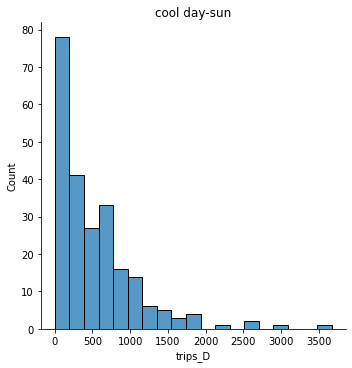

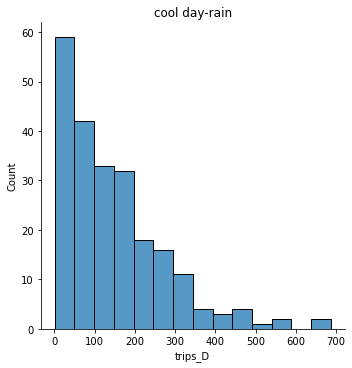

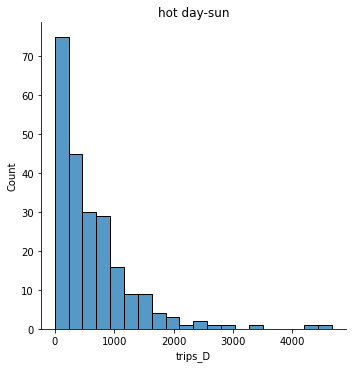

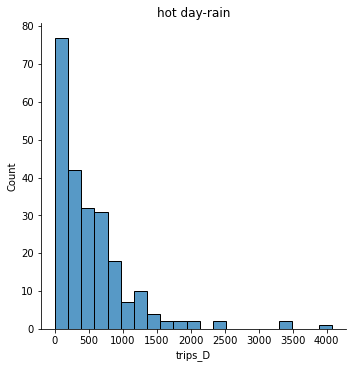

In [79]:
dfA1 = dfA[dfA['day'] == '2021-04-29']     
sns.displot(dfA1['trips_D'])
plt.title('cool day-sun')

dfA1 = dfA[dfA['day'] == '2021-05-03']
sns.displot(dfA1['trips_D'])
plt.title('cool day-rain')

                                                                                                                                                                                         
dfA1 = dfA[dfA['day'] == '2021-08-17']
sns.displot(dfA1['trips_D'])
plt.title('hot day-sun')

dfA1 = dfA[dfA['day'] == '2021-05-18']
sns.displot(dfA1['trips_D'])
plt.title('hot day-rain')


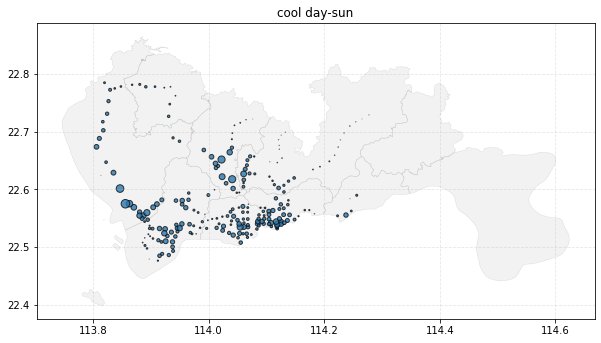

In [73]:
                                                                                                                                                                                         
dfA1 = dfA[dfA['day'] == '2021-04-29']
fig,ax=plt.subplots(figsize=(10,12))

functional_label = {
    'Center' : 1,
     'Sub-center' : 2,
     'Outskirt' : 3,
     'Rural' : 4,
}

plt.scatter(dfA1['lon'],dfA1['lat'],
                s = dfA1['trips_D']/50, edgecolors='k', alpha = 0.8)
region.plot(ax=ax,edgecolor='k', linewidth = 0.5, color = 'gray', alpha = 0.1)
plt.title('cool day-sun')
plt.grid(ls='--',alpha=0.3)
plt.rc('legend', fontsize='medium')


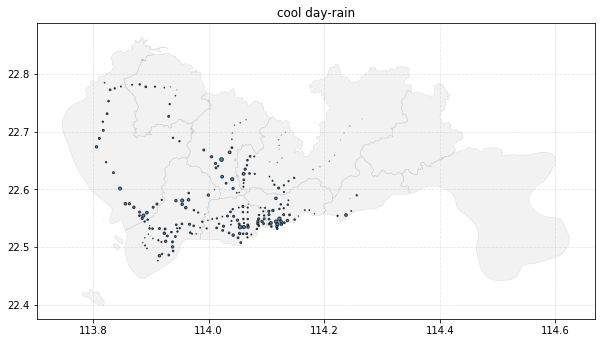

In [74]:
                                                                                                                                                                                         
dfA1 = dfA[dfA['day'] == '2021-05-03']
fig,ax=plt.subplots(figsize=(10,12))

functional_label = {
    'Center' : 1,
     'Sub-center' : 2,
     'Outskirt' : 3,
     'Rural' : 4,
}

plt.scatter(dfA1['lon'],dfA1['lat'],
                s = dfA1['trips_D']/50, edgecolors='k', alpha = 0.8)

region.plot(ax=ax,edgecolor='k', linewidth = 0.5, color = 'gray', alpha = 0.1)
plt.title('cool day-rain')
plt.grid(ls='--',alpha=0.3)
plt.rc('legend', fontsize='medium')



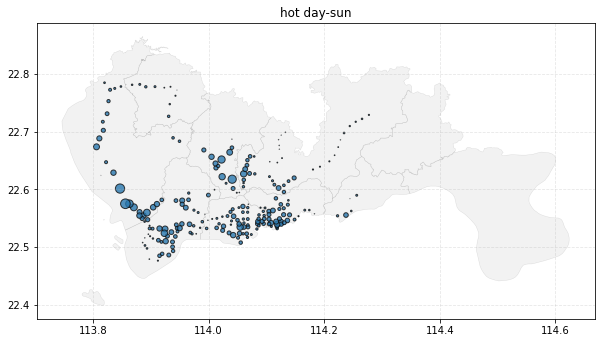

In [75]:
                                                                                                                                                                                         
dfA1 = dfA[dfA['day'] == '2021-08-17']
fig,ax=plt.subplots(figsize=(10,12))

functional_label = {
    'Center' : 1,
     'Sub-center' : 2,
     'Outskirt' : 3,
     'Rural' : 4,
}


plt.scatter(dfA1['lon'],dfA1['lat'],
                s = dfA1['trips_D']/50, edgecolors='k', alpha = 0.8)

region.plot(ax=ax,edgecolor='k', linewidth = 0.5, color = 'gray', alpha = 0.1)
plt.title('hot day-sun')
plt.grid(ls='--',alpha=0.3)
plt.rc('legend', fontsize='medium')



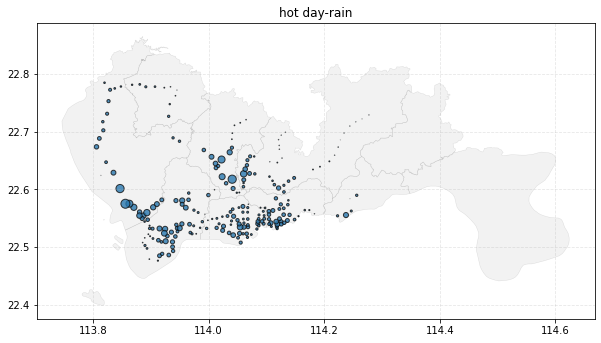

In [76]:
                                                                                                                                                                                         
dfA1 = dfA[dfA['day'] == '2021-05-18']
fig,ax=plt.subplots(figsize=(10,12))

functional_label = {
    'Center' : 1,
     'Sub-center' : 2,
     'Outskirt' : 3,
     'Rural' : 4,
}

plt.scatter(dfA1['lon'],dfA1['lat'],
                s = dfA1['trips_D']/50, edgecolors='k', alpha = 0.8)

region.plot(ax=ax,edgecolor='k', linewidth = 0.5, color = 'gray', alpha = 0.1)
plt.title('hot day-rain')
plt.grid(ls='--',alpha=0.3)
plt.rc('legend', fontsize='medium')



#  Egress_integrated_ues

In [21]:
Egress_integrated_ues = pd.read_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\Egress_integrated_ues_H.csv").drop(columns = {'Unnamed: 0'})

In [22]:
dfE = Egress_integrated_ues.groupby(['time_hour','stationnam']).sum().reset_index()
dfE['time_hour'] = dfE['time_hour'].astype('datetime64')
dfE = dfE[(dfE['time_hour'].dt.strftime("%Y%m%d")>='20210420')&(dfE['time_hour'].dt.strftime("%Y%m%d")<='20210820')]

In [23]:
dfE['time_hour'] = dfE['time_hour'].astype('datetime64[ns]')
dfE['time_hour'] = dfE['time_hour'].dt.strftime("%Y-%m-%d %H")
dfE = dfE [['stationnam', 'trips_O', 'time', 'time_hour']]
dfE['time_hour'] = dfE['time_hour'].astype('datetime64[ns]')
dfE['day'] = dfE['time_hour'].dt.strftime("%Y-%m-%d")
dfE

,stationnam,trips_O,time,time_hour,day
198384,上塘,19.0,2021042006,2021-04-20 06:00:00,2021-04-20
198385,上屋,25.0,2021042006,2021-04-20 06:00:00,2021-04-20
198386,上梅林,76.0,2021042006,2021-04-20 06:00:00,2021-04-20
198387,上水径,8.0,2021042006,2021-04-20 06:00:00,2021-04-20
198388,上沙,112.0,2021042006,2021-04-20 06:00:00,2021-04-20
...,...,...,...,...,...
694268,黄贝岭,186.0,2021082023,2021-08-20 23:00:00,2021-08-20
694269,龙井,23.0,2021082023,2021-08-20 23:00:00,2021-08-20
694270,龙华,64.0,2021082023,2021-08-20 23:00:00,2021-08-20
694271,龙城广场,9.0,2021082023,2021-08-20 23:00:00,2021-08-20


## morning

In [24]:
dfE_morning = dfE[(dfE['time_hour'].dt.hour >=7)&(dfE['time_hour'].dt.hour<=9)]

In [25]:
dfE_morning = dfE_morning.groupby(['stationnam','day']).sum().reset_index()
dfE_morning

<ipython-input-25-6aba931a0c58>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfE_morning = dfE_morning.groupby(['stationnam','day']).sum().reset_index()


,stationnam,day,trips_O,time
0,上塘,2021-04-20,543.0,6063126024
1,上塘,2021-04-21,612.0,6063126324
2,上塘,2021-04-22,626.0,6063126624
3,上塘,2021-04-23,538.0,6063126924
4,上塘,2021-04-24,329.0,6063127224
...,...,...,...,...
28253,龙胜,2021-08-16,420.0,6063244824
28254,龙胜,2021-08-17,446.0,6063245124
28255,龙胜,2021-08-18,462.0,6063245424
28256,龙胜,2021-08-19,438.0,6063245724


In [26]:
dfE_morning['day'] = dfE_morning['day'].astype('datetime64')

# weekdays
dfE_morning['week'] = dfE_morning['day'].dt.weekday
dfE_morning.loc[(dfE_morning.week >= 5) ,'weekday'] = 'weekend'
dfE_morning.loc[(dfE_morning.week <= 4) ,'weekday'] = 'weekday'

dfE_morning

,stationnam,day,trips_O,time,week,weekday
0,上塘,2021-04-20,543.0,6063126024,1,weekday
1,上塘,2021-04-21,612.0,6063126324,2,weekday
2,上塘,2021-04-22,626.0,6063126624,3,weekday
3,上塘,2021-04-23,538.0,6063126924,4,weekday
4,上塘,2021-04-24,329.0,6063127224,5,weekend
...,...,...,...,...,...,...
28253,龙胜,2021-08-16,420.0,6063244824,0,weekday
28254,龙胜,2021-08-17,446.0,6063245124,1,weekday
28255,龙胜,2021-08-18,462.0,6063245424,2,weekday
28256,龙胜,2021-08-19,438.0,6063245724,3,weekday


In [27]:
weather_metro = pd.read_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\weather_variable.csv").drop(columns = 'Unnamed: 0')
weather_metro['time_weather'] = weather_metro['time_weather'].astype('datetime64')
weather_metro_morning = weather_metro[(weather_metro['time_weather'].dt.hour>=7)&(weather_metro['time_weather'].dt.hour<=9)]

weather_metro_morning = weather_metro_morning.groupby(['day']).mean().reset_index()
weather_metro_morning['rain'] = np.where(weather_metro_morning['rain']> 0, 1, 0) 
weather_metro_morning['day'] = weather_metro_morning['day'].astype('datetime64')
weather_metro_morning

<ipython-input-27-e18208d24471>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_metro_morning = weather_metro_morning.groupby(['day']).mean().reset_index()


,day,Tem.(°C),Wind(km/h),Hum.(%),Pressure(hpa),weather_code,hour,rain
0,2021-01-01,7.333333,11.000000,27.333333,1028.333333,1.000000,8.0,0
1,2021-01-02,9.666667,6.666667,25.333333,1025.000000,1.000000,8.0,0
2,2021-01-03,12.333333,7.000000,60.000000,1023.000000,1.000000,8.0,0
3,2021-01-04,17.333333,7.000000,32.000000,1022.333333,1.000000,8.0,0
4,2021-01-05,18.333333,6.333333,41.333333,1021.333333,1.000000,8.0,0
...,...,...,...,...,...,...,...,...
238,2021-08-27,29.666667,6.333333,74.666667,1011.666667,2.333333,8.0,1
239,2021-08-28,28.666667,3.666667,63.333333,1011.666667,1.000000,8.0,0
240,2021-08-29,29.333333,3.333333,67.333333,1011.333333,1.000000,8.0,0
241,2021-08-30,29.666667,6.000000,73.333333,1011.666667,1.000000,8.0,0


In [28]:
dfE_morning = dfE_morning.merge(weather_metro_morning, how = 'inner', on = 'day')

In [29]:
dfE_morning

,stationnam,day,trips_O,time,week,weekday,Tem.(°C),Wind(km/h),Hum.(%),Pressure(hpa),weather_code,hour,rain
0,上塘,2021-04-20,543.0,6063126024,1,weekday,23.000000,5.666667,63.666667,1013.666667,1.000000,8.0,0
1,上屋,2021-04-20,390.0,6063126024,1,weekday,23.000000,5.666667,63.666667,1013.666667,1.000000,8.0,0
2,上李朗,2021-04-20,18.0,6063126024,1,weekday,23.000000,5.666667,63.666667,1013.666667,1.000000,8.0,0
3,上梅林,2021-04-20,1011.0,6063126024,1,weekday,23.000000,5.666667,63.666667,1013.666667,1.000000,8.0,0
4,上水径,2021-04-20,132.0,6063126024,1,weekday,23.000000,5.666667,63.666667,1013.666667,1.000000,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28253,黄贝岭,2021-08-20,1209.0,6063246024,4,weekday,27.666667,5.000000,84.000000,1010.000000,2.333333,8.0,1
28254,龙井,2021-08-20,607.0,6063246024,4,weekday,27.666667,5.000000,84.000000,1010.000000,2.333333,8.0,1
28255,龙华,2021-08-20,1315.0,6063246024,4,weekday,27.666667,5.000000,84.000000,1010.000000,2.333333,8.0,1
28256,龙城广场,2021-08-20,113.0,6063246024,4,weekday,27.666667,5.000000,84.000000,1010.000000,2.333333,8.0,1


In [30]:
dfE_morning = dfE_morning[['stationnam','trips_O','day','Tem.(°C)','Wind(km/h)','Hum.(%)','Pressure(hpa)','rain','week','weekday']]

In [31]:
dfE_morning = dfE_morning.drop_duplicates()

In [32]:
dfE_morning.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\mean_trips\dfE_morning.csv",encoding = 'utf-8-sig')

## test 

In [33]:
# you take 4 examaple days (cold weather, hot weather, rain, etc)

In [34]:
dfE_morning.describe()

,trips_O,Tem.(°C),Wind(km/h),Hum.(%),Pressure(hpa),rain,week
count,28258.000000,28258.000000,28258.000000,28258.000000,28258.000000,28258.000000,28258.000000
mean,408.197112,28.397846,6.701489,82.306792,1007.048270,0.243259,2.984146
std,412.490960,1.984075,2.502152,6.465219,4.492725,0.429058,1.979286
min,1.000000,21.333333,2.000000,63.666667,995.666667,0.000000,0.000000
25%,98.000000,27.333333,5.000000,79.000000,1005.000000,0.000000,1.000000
50%,286.000000,29.000000,6.666667,83.666667,1007.333333,0.000000,3.000000
75%,587.000000,29.666667,8.000000,87.333333,1010.000000,0.000000,5.000000
max,3311.000000,30.666667,15.000000,96.333333,1016.000000,1.000000,6.000000


In [35]:
dfE_morning[(dfE_morning['rain'] == 0)&(dfE_morning['weekday'] == 'weekday')]

,stationnam,trips_O,day,Tem.(°C),Wind(km/h),Hum.(%),Pressure(hpa),rain,week,weekday
0,上塘,543.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
1,上屋,390.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
2,上李朗,18.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
3,上梅林,1011.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
4,上水径,132.0,2021-04-20,23.000000,5.666667,63.666667,1013.666667,0,1,weekday
...,...,...,...,...,...,...,...,...,...,...
27794,黄贝岭,1250.0,2021-08-18,29.666667,4.666667,84.000000,1008.666667,0,2,weekday
27795,龙井,708.0,2021-08-18,29.666667,4.666667,84.000000,1008.666667,0,2,weekday
27796,龙华,1363.0,2021-08-18,29.666667,4.666667,84.000000,1008.666667,0,2,weekday
27797,龙城广场,123.0,2021-08-18,29.666667,4.666667,84.000000,1008.666667,0,2,weekday


In [36]:
# cool day-sun,hot-sun,cool-rain,hot-rain
test_morning_E  = dfE_morning[(dfE_morning['day'] == '2021-04-29') |(dfE_morning['day'] == '2021-08-17')
            |(dfE_morning['day'] == '2021-05-03')|(dfE_morning['day'] == '2021-05-18')]

test_morning_E

,stationnam,trips_O,day,Tem.(°C),Wind(km/h),Hum.(%),Pressure(hpa),rain,week,weekday
2074,上塘,373.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
2075,上屋,293.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
2076,上李朗,18.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
2077,上梅林,623.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
2078,上水径,94.0,2021-04-29,21.333333,7.666667,81.333333,1014.666667,0,3,weekday
...,...,...,...,...,...,...,...,...,...,...
27567,黄贝岭,1225.0,2021-08-17,29.333333,4.666667,84.000000,1012.000000,0,1,weekday
27568,龙井,686.0,2021-08-17,29.333333,4.666667,84.000000,1012.000000,0,1,weekday
27569,龙华,1282.0,2021-08-17,29.333333,4.666667,84.000000,1012.000000,0,1,weekday
27570,龙城广场,125.0,2021-08-17,29.333333,4.666667,84.000000,1012.000000,0,1,weekday


In [37]:
test_morning_E.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\mean_trips\test_morning_E.csv",encoding = 'utf-8-sig')